- It is an unsupervised based method that retrive the subset of the document from the raw data without analyse the meaning that's why it is not popular one nowdays. Here I'm extracting the summarization from the raw day by using text ranking algorithms which is inbuilt in gensim library.
  - **Text Ranking(simple graph based tecnique)** : OK So, According to paper, It is graph based ranking model that is used for text preprocessing. [Paper](https://web.eecs.umich.edu/~mihalcea/papers/mihalcea.emnlp04.pdf). I'll explaing little bit here, As we know graph is a container or datastructure that comtainf vertex and edge (V,E). So here conider whole text split into a sentences, then this algorithms build a graph where sentences are the nodes and overlapped words are the link then later on page ranking algorithms are applied. I've performed this algo on our datasets using gensim library.
- **Abstractive**
  - **Sq2Sq Encoder and Decoder with attension based model:** This one is the 2nd one that is the most popular one. Here I'm plaining to genrate the summarization with tghe use of Sq2Sq model based on word embeddings and provide attention weightage on the input sentences where input should be padded same lenght to get feture matrix. then apply Word2Vec machanism where words are mapped eith real number vector from the vocabulary. The encoder and decoder neural network introduced where input seq passed into encode (LSTM and BiLST based) to genrate a context meaning sentecnces for the decoder.


- **Pretrain BART (BERT+GPT):** 
  - It is a simple pretrain BERT and GPT based Model that we will used with the use of Hugging Face library.

- **Datasets Introduction**
- **Text Preprocessing**
- **Texture Visualization**
- **Model Implemetation** 
- **Accuracy Metrix**



# **Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
!pip install contractions
!pip install lime
!pip install shap
!pip install langdetect
!pip install rouge
!pip install transformers

In [ ]:
import nltk
import nltk
nltk.download('stopwords')
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **DataSets Introduction**

In [ ]:
file_name = '/content/cnndm/train.txt.src'

In [ ]:
file = open(file_name, "r")
filedata = file.readlines()

def read_article(file_name):
  sentences = []
  file = open(file_name, "r")
  filedata = file.readlines()
  for text in filedata:
    sentences.append(text)

  return sentences



In [ ]:
train_data = read_article(file_name)

In [ ]:
train_data = pd.DataFrame(train_data)

In [ ]:
train_data.shape

(50000, 1)

In [ ]:
train_data = train_data.iloc[:5000,:]

In [ ]:
train_data.head()

,0
0,editor 's note : in our behind the scenes seri...
1,"london , england -lrb- reuters -rrb- -- harry ..."
2,"minneapolis , minnesota -lrb- cnn -rrb- -- dri..."
3,"baghdad , iraq -lrb- cnn -rrb- -- dressed in a..."
4,washington -lrb- cnn -rrb- -- doctors removed ...


In [ ]:
train_data.shape

(5000, 1)

In [ ]:
label_file = '/content/cnndm/test.txt.tgt.tagged'

In [ ]:

def read_label(file_name):
  label = []
  file = open(file_name, "r")
  filedata = file.readlines()
  for text in filedata:
    label.append(text)

  return label



In [ ]:
label = (read_label(label_file))

In [ ]:
label[0]

"<t> marseille prosecutor says `` so far no videos were used in the crash investigation '' despite media reports . </t> <t> journalists at bild and paris match are `` very confident '' the video clip is real , an editor says . </t> <t> andreas lubitz had informed his lufthansa training school of an episode of severe depression , airline says . </t>\n"

In [ ]:
train_label = pd.DataFrame(label)

In [ ]:

train_label.shape

(5000, 1)

In [ ]:
train_label = train_label.iloc[:5000,:]

In [ ]:
train_label.head()

,0
0,<t> marseille prosecutor says `` so far no vid...
1,<t> membership gives the icc jurisdiction over...
2,<t> amnesty 's annual death penalty report cat...
3,<t> amnesty international releases its annual ...
4,<t> museum : anne frank died earlier than prev...


In [ ]:
dtf = pd.concat([train_data, train_label], axis = 1, ignore_index=True)
dtf = dtf.rename({0:'text', 1: 'label'},axis = 1)
dtf.head()

,text,label
0,editor 's note : in our behind the scenes seri...,<t> marseille prosecutor says `` so far no vid...
1,"london , england -lrb- reuters -rrb- -- harry ...",<t> membership gives the icc jurisdiction over...
2,"minneapolis , minnesota -lrb- cnn -rrb- -- dri...",<t> amnesty 's annual death penalty report cat...
3,"baghdad , iraq -lrb- cnn -rrb- -- dressed in a...",<t> amnesty international releases its annual ...
4,washington -lrb- cnn -rrb- -- doctors removed ...,<t> museum : anne frank died earlier than prev...


In [ ]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5000 non-null   object
 1   label   5000 non-null   object
dtypes: object(2)
memory usage: 78.2+ KB


In [ ]:
# check
i = 4
print("--- Full text ---")
print(dtf["text"][i])
print(" ")
print("--- Summary ---")
print(dtf["label"][i])

--- Full text ---
washington -lrb- cnn -rrb- -- doctors removed five small polyps from president bush 's colon on saturday , and `` none appeared worrisome , '' a white house spokesman said . the polyps were removed and sent to the national naval medical center in bethesda , maryland , for routine microscopic examination , spokesman scott stanzel said . results are expected in two to three days . all were small , less than a centimeter -lsb- half an inch -rsb- in diameter , he said . bush is in good humor , stanzel said , and will resume his activities at camp david . during the procedure vice president dick cheney assumed presidential power . bush reclaimed presidential power at 9:21 a.m. after about two hours . doctors used `` monitored anesthesia care , '' stanzel said , so the president was asleep , but not as deeply unconscious as with a true general anesthetic . he spoke to first lady laura bush -- who is in midland , texas , celebrating her mother 's birthday -- before and after

# ***Text Preprocessing***

- **Text cleaning**
- **Word frequency**
- **Length analysis**

###### **Text cleaning Funtion wrapper** 
- Here, I'm running wrapper text preprocessing function that I've implemented in externally `.py` file. I'll attached this in zip file 

# **Appy Preprocessing on Raw Data**

In [ ]:
def create_stopwords(lst_langs=["english"], lst_add_words=[], lst_keep_words=[]):
    lst_stopwords = set()
    for lang in lst_langs:
        lst_stopwords = lst_stopwords.union( set(nltk.corpus.stopwords.words(lang)) )
    lst_stopwords = lst_stopwords.union(lst_add_words)
    lst_stopwords = list(set(lst_stopwords) - set(lst_keep_words))
    return sorted(list(set(lst_stopwords)))

In [ ]:
lst_stopwords = create_stopwords()
lst_stopwords = lst_stopwords + ["lrb","rrb","ann","new","wa","ha"]

In [ ]:
import re

In [ ]:
dtf = add_preprocessed_text(dtf, column="text", 
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf = add_preprocessed_text(dtf, column="label", 
                            punkt=True, lower=True, slang=True, lst_stopwords=lst_stopwords, lemm=True)
dtf.head()

--- found NAs ---
    text text_clean
598   \n           
611   \n           
676   \n           
687   \n           
986   \n           


,text,label,text_clean,label_clean
0,editor 's note : in our behind the scenes seri...,<t> marseille prosecutor says `` so far no vid...,editor note behind scene series cnn correspond...,marseille prosecutor say far video used crash ...
1,"london , england -lrb- reuters -rrb- -- harry ...",<t> membership gives the icc jurisdiction over...,london england reuters harry potter star danie...,membership give icc jurisdiction alleged crime...
2,"minneapolis , minnesota -lrb- cnn -rrb- -- dri...",<t> amnesty 's annual death penalty report cat...,minneapolis minnesota cnn driver minneapolis b...,amnesty annual death penalty report catalog en...
3,"baghdad , iraq -lrb- cnn -rrb- -- dressed in a...",<t> amnesty international releases its annual ...,baghdad iraq cnn dressed superman shirt 5yearo...,amnesty international release annual review de...
4,washington -lrb- cnn -rrb- -- doctors removed ...,<t> museum : anne frank died earlier than prev...,washington cnn doctor removed five small polyp...,museum anne frank died earlier previously beli...


In [ ]:
# check
print("--- Full text ---")
print(dtf["text_clean"][i])
print(" ")
print("--- Summary ---")
print(dtf["label_clean"][i])

--- Full text ---
washington cnn doctor removed five small polyp president bush colon saturday none appeared worrisome white house spokesman said polyp removed sent national naval medical center bethesda maryland routine microscopic examination spokesman scott stanzel said result expected two three day small le centimeter lsb half inch rsb diameter said bush good humor stanzel said resume activity camp david procedure vice president dick cheney assumed presidential power bush reclaimed presidential power 921 two hour doctor used monitored anesthesia care stanzel said president asleep deeply unconscious true general anesthetic spoke first lady laura bush midland texas celebrating mother birthday procedure stanzel said afterward president played scottish terrier barney miss beazley stanzel said planned lunch camp david briefing national security adviser stephen hadley white house chief staff josh bolten planned take bicycle ride saturday afternoon cheney meanwhile spent morning home mary

# **Text Visualization**
- Word frequency Visualization 

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

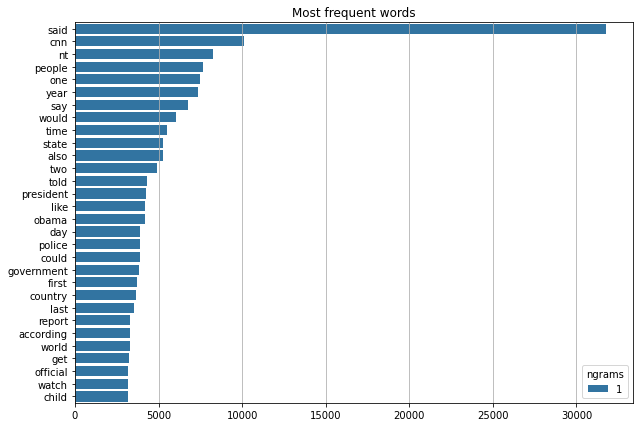

In [ ]:
# Find most common words in text
dtf_freq = word_freq(corpus=dtf["text_clean"], ngrams=[1], top=30, figsize=(10,7))

In [ ]:
thres = 5
X_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
X_top_words

19832

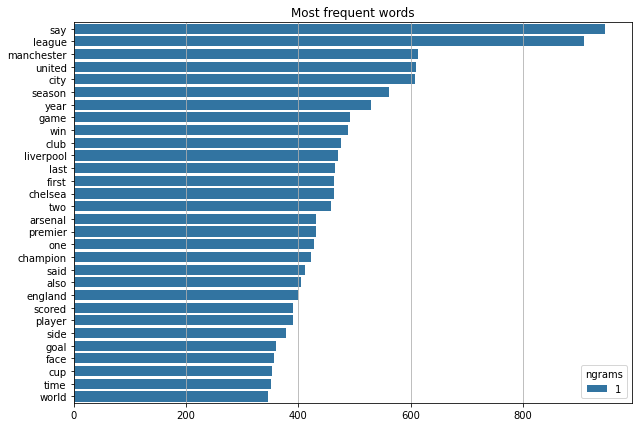

In [ ]:
# Find most common words in summaries
dtf_freq = word_freq(corpus=dtf["label_clean"], ngrams=[1], top=30, figsize=(10,7))

In [ ]:
thres = 5
y_top_words = len(dtf_freq[dtf_freq["freq"]>thres])
y_top_words

4114

###### Length analysis

In [ ]:
# Texts
X = add_text_length(dtf, "text_clean")

                           min         mean          max
char_count           78.000000  2131.044422  6956.000000
word_count           13.000000   350.086432  1030.000000
sentence_count        1.000000     1.000000     1.000000
avg_word_length       4.793103     6.106794     7.519685
avg_sentence_lenght  13.000000   350.086432  1030.000000


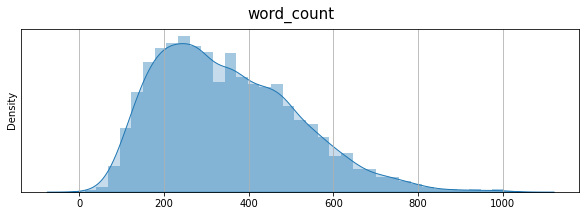

In [ ]:
plot_distributions(X, x="word_count", figsize=(10,3))

In [ ]:
X_len = 400

In [ ]:
# Summaries
y = add_text_length(dtf, "label_clean")

                      min        mean     max
char_count           32.0  171.584322  1684.0
word_count            5.0   29.202613   290.0
sentence_count        1.0    1.000000     1.0
avg_word_length       4.0    5.904664     8.5
avg_sentence_lenght   5.0   29.202613   290.0


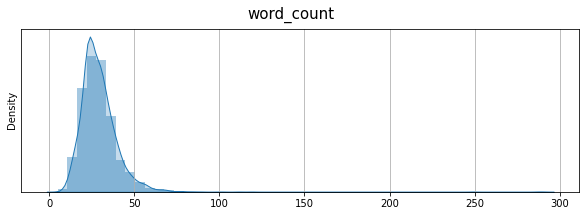

In [ ]:
plot_distributions(y, x="word_count", max_cat=1, figsize=(10,3))

In [ ]:
y_len = 40

In [ ]:
dtf = dtf[["text","text_clean","label","label_clean"]]
dtf.head()

,text,text_clean,label,label_clean
0,editor 's note : in our behind the scenes seri...,editor note behind scene series cnn correspond...,<t> marseille prosecutor says `` so far no vid...,marseille prosecutor say far video used crash ...
1,"london , england -lrb- reuters -rrb- -- harry ...",london england reuters harry potter star danie...,<t> membership gives the icc jurisdiction over...,membership give icc jurisdiction alleged crime...
2,"minneapolis , minnesota -lrb- cnn -rrb- -- dri...",minneapolis minnesota cnn driver minneapolis b...,<t> amnesty 's annual death penalty report cat...,amnesty annual death penalty report catalog en...
3,"baghdad , iraq -lrb- cnn -rrb- -- dressed in a...",baghdad iraq cnn dressed superman shirt 5yearo...,<t> amnesty international releases its annual ...,amnesty international release annual review de...
4,washington -lrb- cnn -rrb- -- doctors removed ...,washington cnn doctor removed five small polyp...,<t> museum : anne frank died earlier than prev...,museum anne frank died earlier previously beli...


# **After Preprocessing Data**

In [ ]:
# Partitioning
dtf_train = dtf.iloc[i+1:]
dtf_test = dtf.iloc[:i+1]
dtf_test

,text,text_clean,label,label_clean
0,editor 's note : in our behind the scenes seri...,editor note behind scene series cnn correspond...,<t> marseille prosecutor says `` so far no vid...,marseille prosecutor say far video used crash ...
1,"london , england -lrb- reuters -rrb- -- harry ...",london england reuters harry potter star danie...,<t> membership gives the icc jurisdiction over...,membership give icc jurisdiction alleged crime...
2,"minneapolis , minnesota -lrb- cnn -rrb- -- dri...",minneapolis minnesota cnn driver minneapolis b...,<t> amnesty 's annual death penalty report cat...,amnesty annual death penalty report catalog en...
3,"baghdad , iraq -lrb- cnn -rrb- -- dressed in a...",baghdad iraq cnn dressed superman shirt 5yearo...,<t> amnesty international releases its annual ...,amnesty international release annual review de...
4,washington -lrb- cnn -rrb- -- doctors removed ...,washington cnn doctor removed five small polyp...,<t> museum : anne frank died earlier than prev...,museum anne frank died earlier previously beli...


# **Model Implementation**
- ### Extractive: TextRank

In [ ]:
# Test (no Train)
predicted = textrank(corpus=dtf_test["text"], ratio=y_len/X_len)

In [ ]:
# Evaluate
evaluate_summary(dtf_test["label"][i], predicted[i])

rouge1: 0.08 | rouge2: 0.0 | rougeL: 0.0 --> avg rouge: 0.05


In [ ]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["label"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [ ]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

###### Features Engineering

--- tokenization ---
19834 words
--- padding to sequence ---
4970 sequences of length 400


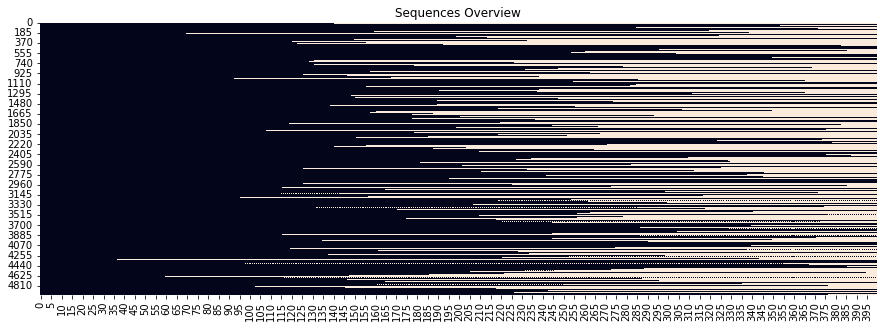

In [ ]:
# Create X_train for seq2seq (sequences of tokens)
dic_seq = text2seq(corpus=dtf_train["text_clean"], top=X_top_words, maxlen=X_len)

X_train, X_tokenizer, X_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [ ]:
dict(list(X_dic_vocabulary.items())[0:6])

{'<PAD>': 0, 'cnn': 2, 'nt': 3, 'one': 5, 'people': 4, 'said': 1}

--- tokenization ---
--- padding to sequence ---
5 sequences of length 400


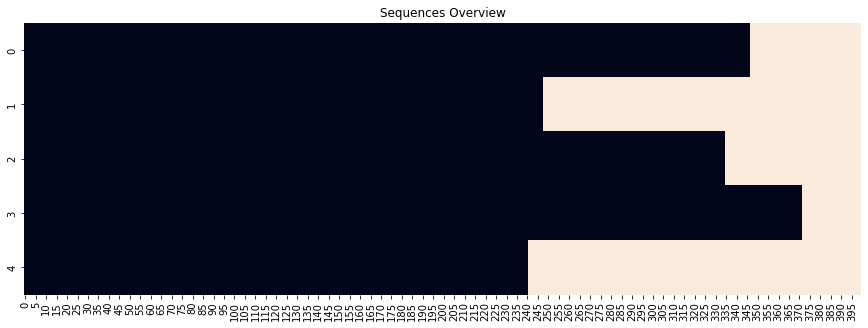

In [ ]:
# Preprocess X_test with the same tokenizer
X_test = text2seq(corpus=dtf_test["text_clean"], fitted_tokenizer=X_tokenizer, maxlen=X_train.shape[1])

In [ ]:
# Add START and END tokens to the summaries (y)
special_tokens = ("<START>", "<END>")
dtf_train["label_clean"] = dtf_train['label_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["label_clean"] = dtf_test['label_clean'].apply(lambda x: special_tokens[0]+' '+x+' '+special_tokens[1])
dtf_test["label_clean"][i]

'<START> museum anne frank died earlier previously believed researcher reexamined archive testimony survivor anne older sister margot frank believed died february 1945 <END>'

--- tokenization ---
4116 words
--- padding to sequence ---
4970 sequences of length 40


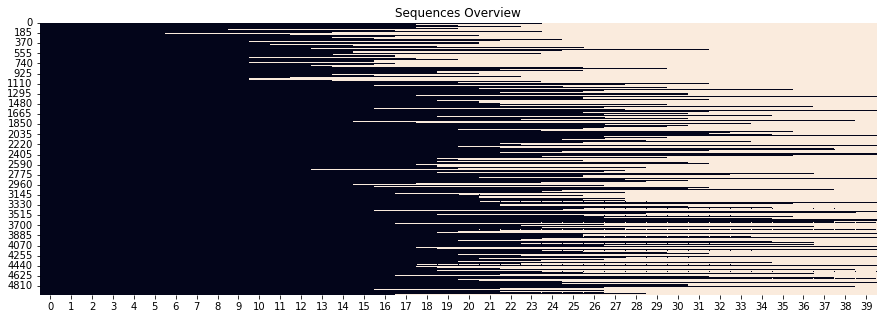

In [ ]:
# Tokenize the summaries (y_train)
dic_seq = text2seq(corpus=dtf_train["label_clean"], top=y_top_words, maxlen=y_len)

y_train, y_tokenizer, y_dic_vocabulary = dic_seq["X"], dic_seq["tokenizer"], dic_seq["dic_vocabulary"]

In [ ]:
dict(list(y_dic_vocabulary.items())[0:6])

{'<END>': 2, '<PAD>': 0, '<START>': 1, 'league': 4, 'manchester': 5, 'say': 3}

--- tokenization ---
--- padding to sequence ---
5 sequences of length 40


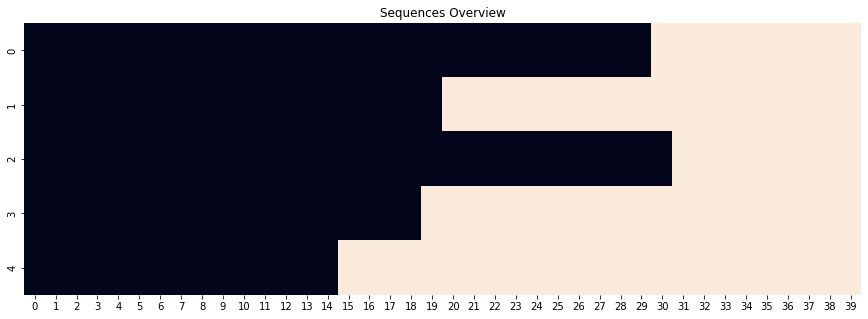

In [ ]:
# Preprocess y_test with the same tokenizer
y_test = text2seq(corpus=dtf_test["label_clean"], fitted_tokenizer=y_tokenizer, maxlen=y_train.shape[1])

# **Model (Abstractive)**
- **Basic Seq2Seq**
  - Encoder (pre-trained embeddings LSTM based)
  - Decoder (pre-trained embeddings LSTM + Dense Layers)
- Advance Sq2Sq
  - Encoder (pre-trained embeddings + 3 bi-lstm)
  - Decoder (pre-trained embeddings + lstm)

###### Create Embedding Weights

In [ ]:
# Load pre-trained Word2Vec
nlp = gensim_api.load("glove-wiki-gigaword-300")

In [ ]:
# Or train Word2Vec from scratch
#corpus =  dtf_train["text_clean"].append(dtf_train["y_clean"])
#lst_corpus, nlp = fit_w2v(corpus=corpus, min_count=1, size=300, window=y_avg_len)

In [ ]:
# check nlp model
word = "dog"
nlp[word].shape

(300,)

In [ ]:
X_embeddings = vocabulary_embeddings(X_dic_vocabulary, nlp)
X_embeddings.shape

vocabulary mapped to 19835 vectors of size 300


(19835, 300)

In [ ]:
y_embeddings = vocabulary_embeddings(y_dic_vocabulary, nlp)
y_embeddings.shape

vocabulary mapped to 4117 vectors of size 300


(4117, 300)

In [ ]:
# Basic Seq2Seq
lstm_units = 250
embeddings_size = 300

##------------ ENCODER (embeddings + lstm) -----------------------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=len(X_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
x_emb = layer_x_emb(x_in)
### lstm 
layer_x_lstm = layers.LSTM(name="x_lstm", units=lstm_units, dropout=0.4,  
                           return_sequences=True, return_state=True)
x_out, state_h, state_c = layer_x_lstm(x_emb)

##------------ DECODER (embeddings + lstm + dense) ---------------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=len(y_dic_vocabulary), output_dim=embeddings_size, 
                               trainable=True)
y_emb = layer_y_emb(y_in)
### lstm 
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units, dropout=0.4,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE --------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x_in (InputLayer)              [(None, 400)]        0           []                               
                                                                                                  
 y_in (InputLayer)              [(None, None)]       0           []                               
                                                                                                  
 x_emb (Embedding)              (None, 400, 300)     5950200     ['x_in[0][0]']                   
                                                                                                  
 y_emb (Embedding)              (None, None, 300)    1234800     ['y_in[0][0]']                   
                                                                                            

In [ ]:
# Advanced Seq2Seq
lstm_units = 250

##------------ ENCODER (pre-trained embeddings + 3 bi-lstm) ---------------##
x_in = layers.Input(name="x_in", shape=(X_train.shape[1],))
### embedding
layer_x_emb = layers.Embedding(name="x_emb", input_dim=X_embeddings.shape[0], output_dim=X_embeddings.shape[1], 
                               weights=[X_embeddings], trainable=False)
x_emb = layer_x_emb(x_in)
### bi-lstm 1
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True), 
                                      name="x_lstm_1")
x_out, _, _, _, _ = layer_x_bilstm(x_emb)
### bi-lstm 2
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4,
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_2")
x_out, _, _, _, _ = layer_x_bilstm(x_out)
### bi-lstm 3 (here final states are collected)
layer_x_bilstm = layers.Bidirectional(layers.LSTM(units=lstm_units, dropout=0.4, recurrent_dropout=0.4, 
                                                  return_sequences=True, return_state=True),
                                      name="x_lstm_3")
x_out, forward_h, forward_c, backward_h, backward_c = layer_x_bilstm(x_out)
state_h = layers.Concatenate()([forward_h, backward_h])
state_c = layers.Concatenate()([forward_c, backward_c])

##------------ DECODER (pre-trained embeddings + lstm + dense) ------------##
y_in = layers.Input(name="y_in", shape=(None,))
### embedding
layer_y_emb = layers.Embedding(name="y_emb", input_dim=y_embeddings.shape[0], output_dim=y_embeddings.shape[1], 
                               weights=[y_embeddings], trainable=False)
y_emb = layer_y_emb(y_in)
### lstm
layer_y_lstm = layers.LSTM(name="y_lstm", units=lstm_units*2, dropout=0.2, recurrent_dropout=0.2,
                           return_sequences=True, return_state=True)
y_out, _, _ = layer_y_lstm(y_emb, initial_state=[state_h, state_c])
### final dense layers
layer_dense = layers.TimeDistributed(name="dense", 
                                     layer=layers.Dense(units=len(y_dic_vocabulary), activation='softmax'))
y_out = layer_dense(y_out)

##---------------------------- COMPILE ------------------------------------##
model = models.Model(inputs=[x_in, y_in], outputs=y_out, name="Seq2Seq")
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

model.summary()

Model: "Seq2Seq"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 x_in (InputLayer)              [(None, 400)]        0           []                               
                                                                                                  
 x_emb (Embedding)              (None, 400, 300)     5950500     ['x_in[0][0]']                   
                                                                                                  
 x_lstm_1 (Bidirectional)       [(None, 400, 500),   1102000     ['x_emb[0][0]']                  
                                 (None, 250),                                                     
                                 (None, 250),                                                     
                                 (None, 250),                                               

# **Note : For Sq2Sq model, Require high RAM and GPU. In my case I'm running my model on normal I3-7th Gen base Laptom that doesn n't contains GPU and high RAM Hence, I could not able to train this neural network.**

- **But the machemnism is pretty much simple. LSTM and BiLSTM based model.**

# **Train**

In [ ]:
# This takes a while
model = fit_seq2seq(X_train, y_train, model, build_encoder_decoder=False, 
                    epochs=10, batch_size=64, verbose=1)
#model, encoder_model, decoder_model = fit_seq2seq(X_train, y_train, X_embeddings, y_embeddings, model, 
#                                                  build_encoder_decoder=True, epochs=100, batch_size=64)

Epoch 1/10


# **Test**

In [ ]:
# Prediction Encoder
encoder_model = models.Model(inputs=x_in, outputs=[x_out, state_h, state_c], name="Prediction_Encoder")
encoder_model.summary()

In [ ]:
# Prediction Decoder
## double the lstm units if you used bidirectional lstm
lstm_units = lstm_units*2 if any("Bidirectional" in str(layer) for layer in model.layers) else lstm_units

## states of the previous time step
x_out2 = layers.Input(shape=(X_train.shape[1], lstm_units))
state_h, state_c = layers.Input(shape=(lstm_units,)), layers.Input(shape=(lstm_units,))

## decoder embeddings
y_emb2 = layer_y_emb(y_in)

## lstm to predict the next word
y_out2, new_state_h, new_state_c = layer_y_lstm(y_emb2, initial_state=[state_h, state_c])

## softmax to generate probability distribution over the target vocabulary
probs = layer_dense(y_out2)

## compile
decoder_model = models.Model(inputs=[y_in, x_out2, state_h, state_c], 
                             outputs=[probs, new_state_h, new_state_c],
                             name="Prediction_Decoder")
decoder_model.summary()

In [ ]:
predicted = predict_seq2seq(X_test, encoder_model, decoder_model, y_tokenizer, special_tokens)

In [ ]:
# Evaluate
evaluate_summary(dtf_test["y_clean"][i], predicted[i])

In [ ]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["y_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [ ]:
# Explainability
match = display_string_matching(dtf_test["text_clean"][i], predicted[i], both=True, sentences=False, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

# **BART Model**

In [ ]:
# Test (no Train)
predicted = bart(corpus=dtf_test["text"], max_len = 40)

In [ ]:
# Evaluate
evaluate_summary(dtf_test["label"][i], predicted[i])

rouge1: 0.08 | rouge2: 0.0 | rougeL: 0.0 --> avg rouge: 0.05


In [ ]:
# Compare y_test and predicted
match = display_string_matching(dtf_test["label"][i], predicted[i], both=True, sentences=False, 
                                titles=["Real Summary", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))

In [ ]:
# Explainability
match = display_string_matching(dtf_test["text"][i], predicted[i], both=True, sentences=True, 
                                titles=["Full Text", "Predicted Summary"])

from IPython.core.display import display, HTML
display(HTML(match))